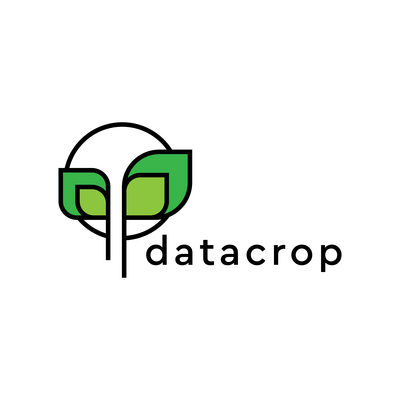


# Análisis de correlaciones Importaciones, Exportaciones vs Casos de Covid 19

Fuente de datos:
- Datos Covid-19 Filtrado a paises de la UE y Limpiados Fuente: Our World in Data https://github.com/owid/covid-19-data/tree/master/public/data
- Datos comercio exterior (Elaboracion propia tras limpieza del Dataset4.- Comercio Exterior de España)

In [1]:
from IPython.display import IFrame
import pandas as pd
import seaborn as sns

df_comercioExterior = pd.read_csv('comercioExterior_Limpio.csv', sep=',')
df_covid19 = pd.read_csv('covid19DatosEU_Limpio.csv',sep=',')

In [2]:
## Primero se separa en dos dataframes de importaciones/exportaciones del año 2020
importaciones_2020 = df_comercioExterior[df_comercioExterior['PERIOD'].str.contains('2020') & df_comercioExterior['FLOW'].str.contains('IMPORT')]
exportaciones_2020 = df_comercioExterior[df_comercioExterior['PERIOD'].str.contains('2020')& df_comercioExterior['FLOW'].str.contains('EXPORT')]

## Realizamos un gropby por los siguientes campos y obtenemos la suma del valor
importaciones_2020 = importaciones_2020.groupby(['REPORTER','PERIOD','INDICATORS','FLOW'],as_index=False)['Value'].sum()
exportaciones_2020 = exportaciones_2020.groupby(['REPORTER','PERIOD','INDICATORS','FLOW'],as_index=False)['Value'].sum()

#Antes de hacer el merge de los dos dataframes anteriores, debemos de crear en el dataframe del covid 19 una columna fecha que sea coincidente con el de las otras
df_covid19['PERIOD'] = pd.to_datetime(df_covid19['month'].map(str) + '-' + df_covid19['year'].map(str)).dt.strftime('%m-%Y')
df_covid19 = df_covid19.groupby(['PERIOD','countriesAndTerritories'],as_index=False)['cases'].sum()

#Realizamos el merge entre tablas por pais y fecha
importacionesMerged = importaciones_2020.merge(df_covid19, left_on=['REPORTER','PERIOD'], right_on=['countriesAndTerritories','PERIOD'], how='inner')
exportacionesMerged = exportaciones_2020.merge(df_covid19, left_on=['REPORTER','PERIOD'], right_on=['countriesAndTerritories','PERIOD'], how='inner')

In [3]:
# Primero analizamos la correlacion de los casos con el número de KG exportados/importados de la UE
importacionesMergedQuantity = importacionesMerged[importacionesMerged['INDICATORS'] == 'QUANTITY_IN_100KG']
exportacionesMergedQuantity = exportacionesMerged[exportacionesMerged['INDICATORS'] == 'QUANTITY_IN_100KG']

In [4]:
impCorrQuantity = importacionesMergedQuantity.corr()

[Text(0.5, 1.0, 'Correlacion de los casos de COVID-19 con la cantidad en KG (Importaciones UE y España)')]

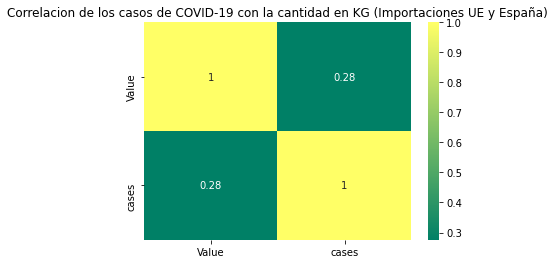

In [5]:
sns.heatmap(impCorrQuantity, annot=True,cmap='summer').set(title='Correlacion de los casos de COVID-19 con la cantidad en KG (Importaciones UE y España)')

In [6]:
expCorrQuantity = exportacionesMergedQuantity.corr()

[Text(0.5, 1.0, 'Correlacion de los casos de COVID-19 con la cantidad en KG (Exportaciones UE y España)')]

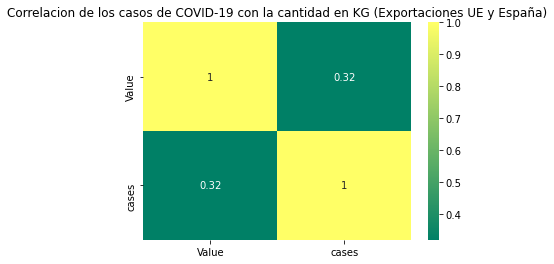

In [7]:
sns.heatmap(expCorrQuantity, annot=True,cmap='summer').set(title='Correlacion de los casos de COVID-19 con la cantidad en KG (Exportaciones UE y España)')

In [8]:
#Realizamos el mismo procedimiento anterior pero ahora con el indicador del valor en euros y realizamos el estudio de correlacion
importacionesMergedValue = importacionesMerged[importacionesMerged['INDICATORS'] == 'VALUE_IN_EUROS']
exportacionesMergedValue = exportacionesMerged[exportacionesMerged['INDICATORS'] == 'VALUE_IN_EUROS']

In [9]:
impCorrValue= importacionesMergedValue.corr()

In [10]:
impCorrValue

,Value,cases
Value,1.000000,0.256968
cases,0.256968,1.000000


[Text(0.5, 1.0, 'Correlacion de los casos de COVID-19 con el Valor (Importaciones UE y España)')]

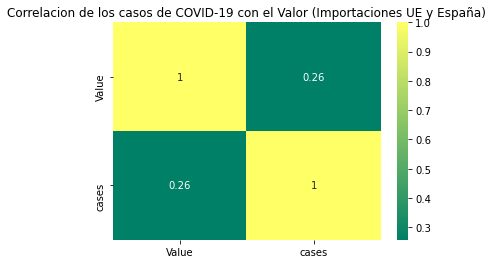

In [11]:
sns.heatmap(impCorrValue, annot=True, cmap='summer').set(title='Correlacion de los casos de COVID-19 con el Valor (Importaciones UE y España)')

In [12]:
expCorrValue= exportacionesMergedValue.corr()

In [13]:
expCorrValue

,Value,cases
Value,1.000000,0.262029
cases,0.262029,1.000000


[Text(0.5, 1.0, 'Correlacion de los casos de COVID-19 con el Valor (Exportaciones UE y España)')]

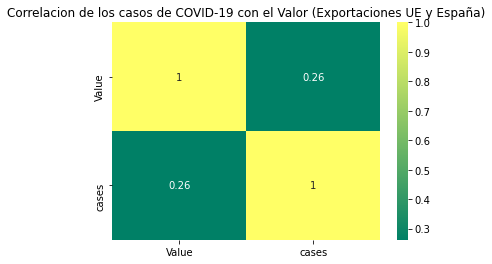

In [14]:
sns.heatmap(expCorrValue, annot=True, cmap='summer').set(title='Correlacion de los casos de COVID-19 con el Valor (Exportaciones UE y España)')

In [15]:
IFrame('https://app.powerbi.com/view?r=eyJrIjoiZmIxNTM4N2EtZGQ3NS00ZmYyLWIxNTctYjEwMjRhNGE0ODEzIiwidCI6IjZhZmVhODVkLWMzMjMtNDI3MC1iNjlkLWE0ZmIzOTI3YzI1NCIsImMiOjl9',height= 650, width = 980)

*Para realizar un estudio de correlaciones entre los casos de covid y el numero de importaciones y exportaciones de la unión europea con respecto a España en dos variantes: casos covid vs numero de kg importados/Exportados y casos covid vs valor de las importaciones/exportaciones. Puede consultar los resultados en detalle del análisis en la página web *

## Análisis de correlaciones extendido: www.datacrop.es/reto-analisis-4